In [1]:
import os
import ast
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as maskUtils

In [2]:
dataset_path = "./dataset/raw"
img_path = os.path.join(dataset_path, "images", "val")
annot_path = os.path.join(dataset_path, "annotations")
captions_path = os.path.join(annot_path, "captions_val2017.json")
instances_path = os.path.join(annot_path, "instances_val2017.json")
person_path = os.path.join(annot_path, "person_keypoints_val2017.json")
stuff_path = os.path.join(annot_path, "stuff_val2017.json")
instances_train_path = os.path.join(annot_path, "instances_train2017.json")
stuff_train_path = os.path.join(annot_path, "stuff_train2017.json")


In [3]:
# for i in glob.glob(os.path.join(img_path, "*.jpg")):
#     print(i)
len(glob.glob(os.path.join(img_path, "*.jpg")))

5000

In [4]:
import json

with open(captions_path, 'r') as file:
    capt_json = json.load(file)
with open(instances_path, 'r') as file:
    inst_json = json.load(file)
with open(person_path, 'r') as file:
    pers_json = json.load(file)
with open(stuff_path, 'r') as file:
    stuf_json = json.load(file)
# with open(instances_train_path, 'r') as file:
#     inst_train_json = json.load(file)
# with open(stuff_train_path, 'r') as file:
#     stuf_train_json = json.load(file)

In [5]:
capt_json.keys(), inst_json.keys(), pers_json.keys(), stuf_json.keys()

(dict_keys(['info', 'licenses', 'images', 'annotations']),
 dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']),
 dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']),
 dict_keys(['info', 'images', 'licenses', 'categories', 'annotations']))

In [6]:
capt_json['images'][0].keys(), capt_json['annotations'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['image_id', 'id', 'caption']))

In [7]:
inst_json['images'][0].keys(), inst_json['annotations'][0].keys(), inst_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name']))

In [8]:
pers_json['images'][0].keys(), pers_json['annotations'][0].keys(), pers_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name', 'keypoints', 'skeleton']))

In [9]:
stuf_json['images'][0].keys(), stuf_json['annotations'][0].keys(), stuf_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name']))

In [10]:
import pandas as pd

In [11]:
df_capt_images = pd.DataFrame(capt_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_capt_annota = pd.DataFrame(capt_json['annotations'])

In [12]:
# df_inst_train_images = pd.DataFrame(inst_train_json['images'], columns=['file_name', 'height', 'width', 'id'])
# df_inst_train_annota = pd.DataFrame(inst_train_json['annotations'])
# df_inst_train_catego = pd.DataFrame(inst_train_json['categories'])

In [13]:
# df_stuf_train_images = pd.DataFrame(stuf_train_json['images'], columns=['file_name', 'height', 'width', 'id'])
# df_stuf_train_annota = pd.DataFrame(stuf_train_json['annotations'])
# df_stuf_train_catego = pd.DataFrame(stuf_train_json['categories'])

In [14]:
df_inst_images = pd.DataFrame(inst_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_inst_annota = pd.DataFrame(inst_json['annotations'])
df_inst_catego = pd.DataFrame(inst_json['categories'])

In [15]:
df_pers_images = pd.DataFrame(pers_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_pers_annota = pd.DataFrame(pers_json['annotations'])
df_pers_catego = pd.DataFrame(pers_json['categories'])

In [16]:
df_stuf_images = pd.DataFrame(stuf_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_stuf_annota = pd.DataFrame(stuf_json['annotations'])
df_stuf_catego = pd.DataFrame(stuf_json['categories'])

In [17]:
pd.merge(df_capt_images, df_capt_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').drop(columns=["id_y", "id_x"])

,file_name,height,width,image_id,caption
0,000000397133.jpg,427,640,397133,A man is in a kitchen making pizzas.
1,000000397133.jpg,427,640,397133,Man in apron standing on front of oven with pa...
2,000000397133.jpg,427,640,397133,A baker is working in the kitchen rolling dough.
3,000000397133.jpg,427,640,397133,A person standing by a stove in a kitchen.
4,000000397133.jpg,427,640,397133,A table with pies being made and a person stan...
...,...,...,...,...,...
25009,000000015335.jpg,480,640,15335,A group of people sitting at a table with food.
25010,000000015335.jpg,480,640,15335,"A man, woman, and boy are sitting at a table."
25011,000000015335.jpg,480,640,15335,"A man, woman and child eating together at a re..."
25012,000000015335.jpg,480,640,15335,A boy sitting between a man and a woman.


In [18]:
pd.merge(df_inst_images, df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').drop(columns=["id_y", "id_x"])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id
0,000000397133.jpg,427,640,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44
1,000000397133.jpg,427,640,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67
2,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1
3,000000397133.jpg,427,640,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49
4,000000397133.jpg,427,640,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51
...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1
36777,000000015335.jpg,480,640,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47
36778,000000015335.jpg,480,640,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77
36779,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1


In [19]:
df_inst_images.merge(df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_inst_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id,supercategory,name
0,000000397133.jpg,427,640,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44,kitchen,bottle
1,000000397133.jpg,427,640,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67,furniture,dining table
2,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1,person,person
3,000000397133.jpg,427,640,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49,kitchen,knife
4,000000397133.jpg,427,640,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51,kitchen,bowl
...,...,...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1,person,person
36777,000000015335.jpg,480,640,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47,kitchen,cup
36778,000000015335.jpg,480,640,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77,electronic,cell phone
36779,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1,person,person


In [20]:
df_pers_images.merge(df_pers_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_pers_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,num_keypoints,area,iscrowd,keypoints_x,image_id,bbox,category_id,supercategory,name,keypoints_y,skeleton
0,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",13,17376.91885,0,"[433, 94, 2, 434, 90, 2, 0, 0, 0, 443, 98, 2, ...",397133,"[388.66, 69.92, 109.41, 277.62]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
1,000000397133.jpg,427,640,"[[0.43, 299.58, 2.25, 299.58, 9.05, 287.78, 32...",1,1037.78190,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",397133,"[0, 262.81, 62.16, 36.77]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
2,000000252219.jpg,428,640,"[[361.81, 368.51, 337.11, 369.76, 342.14, 359....",17,8511.15680,0,"[356, 198, 2, 358, 193, 2, 351, 194, 2, 364, 1...",252219,"[326.28, 174.56, 71.24, 197.25]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
3,000000252219.jpg,428,640,"[[51.12, 277.38, 51.12, 270.21, 50.1, 262.7, 5...",15,8349.28485,0,"[100, 190, 2, 0, 0, 0, 96, 185, 2, 0, 0, 0, 86...",252219,"[9.79, 167.06, 121.94, 226.45]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
4,000000252219.jpg,428,640,"[[576.11, 331.6, 577.82, 337.57, 581.23, 340.1...",15,11337.31575,0,"[536, 192, 1, 538, 188, 2, 0, 0, 0, 552, 190, ...",252219,"[510.44, 171.27, 123.66, 215.76]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,000000015335.jpg,480,640,"[[561.65, 162.93, 548.86, 162.93, 541.45, 162....",2,2982.31285,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15335,"[541.45, 21.21, 75.07, 141.72]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11000,000000015335.jpg,480,640,"[[400.45, 53.65, 382.13, 70.08, 379.79, 79, 37...",4,9835.36940,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 386, 88, 2, 444, 8...",15335,"[343.63, 53.65, 167.62, 111.74]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11001,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",3,5697.13675,0,"[232, 121, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 208, ...",15335,"[160.39, 66.68, 77.99, 84.69]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11002,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",0,453.39980,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15335,"[362.44, 102.44, 24.23, 27.7]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."


In [21]:
df_stuf_images.merge(df_stuf_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_stuf_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id,supercategory,name
0,000000397133.jpg,427,640,{'counts': ']i`11Z=0N2L5YDJdN2^;5nE1n93kE1T:0k...,5184.0,0,397133,"[117.0, 0.0, 193.0, 131.0]",94,plant,branch
1,000000397133.jpg,427,640,{'counts': 'eh]52U=5L5K3L5YC]Oa<h0M4K4M3L4M4M2...,3280.0,0,397133,"[416.0, 219.0, 81.0, 108.0]",98,furniture-stuff,cabinet
2,000000397133.jpg,427,640,{'counts': 'fUj31Y=1O1O1O1O1O1O1N2O1O1O1O1O1O1...,28614.0,0,397133,"[292.0, 311.0, 348.0, 116.0]",115,floor,floor-other
3,000000397133.jpg,427,640,{'counts': 'Vh_47k<90000001O0000000000001O0000...,691.0,0,397133,"[344.0, 309.0, 46.0, 22.0]",116,floor,floor-stone
4,000000397133.jpg,427,640,{'counts': '\982R1e;lN]DT1c;jN_DV1`;hNcDc0P<]O...,196.0,0,397133,"[0.0, 288.0, 17.0, 64.0]",121,food-stuff,food-other
...,...,...,...,...,...,...,...,...,...,...,...
32796,000000015335.jpg,480,640,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,14525.0,0,15335,"[23.0, 370.0, 229.0, 110.0]",137,textile,napkin
32797,000000015335.jpg,480,640,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,3040.0,0,15335,"[483.0, 432.0, 110.0, 48.0]",139,raw-material,paper
32798,000000015335.jpg,480,640,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,8162.0,0,15335,"[236.0, 384.0, 390.0, 96.0]",165,furniture-stuff,table
32799,000000015335.jpg,480,640,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,34477.0,0,15335,"[0.0, 0.0, 557.0, 158.0]",172,wall,wall-concrete


In [22]:
df_total_catego = pd.concat([df_inst_catego, df_stuf_catego], axis=0, ignore_index=True)
df_total_catego

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane
...,...,...,...
167,water,179,waterdrops
168,window,180,window-blind
169,window,181,window-other
170,solid,182,wood


In [23]:
df_inst_images.merge(df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many')

,file_name,height,width,id_x,segmentation,area,iscrowd,image_id,bbox,category_id,id_y
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44,82445
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67,119568
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1,200887
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49,693231
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51,713388
...,...,...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,15335,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1,1753431
36777,000000015335.jpg,480,640,15335,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47,1879878
36778,000000015335.jpg,480,640,15335,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77,1976132
36779,000000015335.jpg,480,640,15335,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1,2025828


In [24]:
df_stuf_images.merge(df_stuf_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many')

,file_name,height,width,id_x,segmentation,area,iscrowd,image_id,bbox,category_id,id_y
0,000000397133.jpg,427,640,397133,{'counts': ']i`11Z=0N2L5YDJdN2^;5nE1n93kE1T:0k...,5184.0,0,397133,"[117.0, 0.0, 193.0, 131.0]",94,20022062
1,000000397133.jpg,427,640,397133,{'counts': 'eh]52U=5L5K3L5YC]Oa<h0M4K4M3L4M4M2...,3280.0,0,397133,"[416.0, 219.0, 81.0, 108.0]",98,20022063
2,000000397133.jpg,427,640,397133,{'counts': 'fUj31Y=1O1O1O1O1O1O1N2O1O1O1O1O1O1...,28614.0,0,397133,"[292.0, 311.0, 348.0, 116.0]",115,20022064
3,000000397133.jpg,427,640,397133,{'counts': 'Vh_47k<90000001O0000000000001O0000...,691.0,0,397133,"[344.0, 309.0, 46.0, 22.0]",116,20022065
4,000000397133.jpg,427,640,397133,{'counts': '\982R1e;lN]DT1c;jN_DV1`;hNcDc0P<]O...,196.0,0,397133,"[0.0, 288.0, 17.0, 64.0]",121,20022066
...,...,...,...,...,...,...,...,...,...,...,...
32796,000000015335.jpg,480,640,15335,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,14525.0,0,15335,"[23.0, 370.0, 229.0, 110.0]",137,20000943
32797,000000015335.jpg,480,640,15335,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,3040.0,0,15335,"[483.0, 432.0, 110.0, 48.0]",139,20000944
32798,000000015335.jpg,480,640,15335,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,8162.0,0,15335,"[236.0, 384.0, 390.0, 96.0]",165,20000945
32799,000000015335.jpg,480,640,15335,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,34477.0,0,15335,"[0.0, 0.0, 557.0, 158.0]",172,20000946


In [25]:
df_total_images = pd.concat([df_inst_images, df_stuf_images], axis=0, ignore_index=True).drop_duplicates()
df_total_images.sort_values(by="file_name")

,file_name,height,width,id
4145,000000000139.jpg,426,640,139
3513,000000000285.jpg,640,586,285
4979,000000000632.jpg,483,640,632
407,000000000724.jpg,500,375,724
1332,000000000776.jpg,640,428,776
...,...,...,...,...
3058,000000581317.jpg,354,640,581317
3532,000000581357.jpg,612,612,581357
4918,000000581482.jpg,427,640,581482
881,000000581615.jpg,640,478,581615


In [43]:
def polygonFromMask(row):
    if isinstance(row['segmentation'], dict) and 'counts' in row['segmentation']:
        if row['iscrowd'] == 1:
            row['segmentation'] = [row['segmentation']['counts']]
        else:
            rle_data = maskUtils.decode(row['segmentation'])
            contours, _ = cv2.findContours(rle_data, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
            segmentation = []
            for contour in contours:
                if contour.size >= 6:
                    segmentation.append(contour.flatten().tolist())
        
            row['segmentation'] = segmentation
    
    return row

In [45]:
df_total_catego.reset_index()

,index,supercategory,id,name
0,0,person,1,person
1,1,vehicle,2,bicycle
2,2,vehicle,3,car
3,3,vehicle,4,motorcycle
4,4,vehicle,5,airplane
...,...,...,...,...
167,167,water,179,waterdrops
168,168,window,180,window-blind
169,169,window,181,window-other
170,170,solid,182,wood


In [ ]:
df_total_annota = pd.concat([df_inst_annota, df_stuf_annota], axis=0, ignore_index=True).drop(columns=["id"]).merge(df_total_catego.reset_index(), left_on="category_id", right_on="id", how="inner", validate="many_to_one").drop(columns=["id", "supercategory"]).rename(columns={'name': 'category_name', 'category_id': 'old_category_id', 'index': 'category_id'})
df_total_annota = df_total_annota.apply(polygonFromMask, axis=1)
df_total_annota

,segmentation,area,iscrowd,image_id,bbox,category_id,category_name
0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",702.10575,0,289343,"[473.07, 395.93, 38.65, 28.67]",18,dog
1,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",27718.47630,0,61471,"[272.1, 200.23, 151.97, 279.77]",18,dog
2,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347....",78969.31690,0,472375,"[124.71, 196.18, 372.85, 356.81]",18,dog
3,"[[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...",108316.66515,0,520301,"[112.71, 154.82, 367.29, 479.35]",18,dog
4,"[[200.61, 253.97, 273.19, 318.49, 302.43, 336....",75864.53530,0,579321,"[200.61, 89.65, 400.22, 251.02]",18,dog
...,...,...,...,...,...,...,...
69577,"[[426, 428, 425, 429, 423, 429, 422, 430, 418,...",83419.00000,0,581781,"[0.0, 0.0, 640.0, 478.0]",122,fruit
69578,"[[0, 203, 0, 221, 5, 226, 5, 227, 8, 230, 8, 2...",1167.00000,0,581781,"[0.0, 203.0, 40.0, 40.0]",123,furniture-other
69579,"[[165, 475, 164, 476, 157, 476, 156, 477, 155,...",52789.00000,0,581781,"[0.0, 0.0, 578.0, 478.0]",139,paper
69580,"[[447, 407, 447, 419, 446, 420, 445, 420, 444,...",1473.00000,0,581781,"[428.0, 407.0, 51.0, 71.0]",143,plastic


In [ ]:
df_total_annota

,segmentation,area,iscrowd,image_id,bbox,old_category_id,category_name,category_id
0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",702.10575,0,289343,"[473.07, 395.93, 38.65, 28.67]",18,dog,16
1,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",27718.47630,0,61471,"[272.1, 200.23, 151.97, 279.77]",18,dog,16
2,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347....",78969.31690,0,472375,"[124.71, 196.18, 372.85, 356.81]",18,dog,16
3,"[[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...",108316.66515,0,520301,"[112.71, 154.82, 367.29, 479.35]",18,dog,16
4,"[[200.61, 253.97, 273.19, 318.49, 302.43, 336....",75864.53530,0,579321,"[200.61, 89.65, 400.22, 251.02]",18,dog,16
...,...,...,...,...,...,...,...,...
69577,"[[426, 428, 425, 429, 423, 429, 422, 430, 418,...",83419.00000,0,581781,"[0.0, 0.0, 640.0, 478.0]",122,fruit,110
69578,"[[0, 203, 0, 221, 5, 226, 5, 227, 8, 230, 8, 2...",1167.00000,0,581781,"[0.0, 203.0, 40.0, 40.0]",123,furniture-other,111
69579,"[[165, 475, 164, 476, 157, 476, 156, 477, 155,...",52789.00000,0,581781,"[0.0, 0.0, 578.0, 478.0]",139,paper,127
69580,"[[447, 407, 447, 419, 446, 420, 445, 420, 444,...",1473.00000,0,581781,"[428.0, 407.0, 51.0, 71.0]",143,plastic,131


In [51]:
df_combined = df_total_images.merge(df_total_annota, left_on="id", right_on="image_id", how="inner", validate="one_to_many").drop(columns=["image_id"])
df_combined['area'] = df_combined['area'].apply(lambda x: round(x, 2))
df_combined

,file_name,height,width,id,segmentation,area,iscrowd,bbox,old_category_id,category_name,category_id
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38,0,"[217.62, 240.54, 38.99, 57.75]",44,bottle,39
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62,0,"[1.0, 240.24, 346.63, 186.76]",67,dining table,60
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.92,0,"[388.66, 69.92, 109.41, 277.62]",1,person,0
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19,0,"[135.57, 249.43, 22.32, 28.79]",49,knife,43
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.47,0,"[31.28, 344.0, 68.12, 40.83]",51,bowl,45
...,...,...,...,...,...,...,...,...,...,...,...
69577,000000015335.jpg,480,640,15335,"[[96, 370, 95, 371, 85, 371, 84, 372, 80, 372,...",14525.00,0,"[23.0, 370.0, 229.0, 110.0]",137,napkin,125
69578,000000015335.jpg,480,640,15335,"[[509, 432, 508, 433, 499, 433, 498, 434, 497,...",3040.00,0,"[483.0, 432.0, 110.0, 48.0]",139,paper,127
69579,000000015335.jpg,480,640,15335,"[[236, 433, 236, 434, 238, 436, 238, 442, 242,...",8162.00,0,"[236.0, 384.0, 390.0, 96.0]",165,table,153
69580,000000015335.jpg,480,640,15335,"[[167, 59, 163, 63, 161, 63, 160, 64, 159, 64,...",34477.00,0,"[0.0, 0.0, 557.0, 158.0]",172,wall-concrete,160


In [52]:
agg_func = {
    'segmentation': list,
    'bbox': list,
    'old_category_id': list,
    'category_id': list,
    'category_name': list,
    'area': list
}
temp = df_combined.groupby(['file_name', 'height', 'width', 'id']).agg(agg_func).reset_index()
temp

,file_name,height,width,id,segmentation,bbox,old_category_id,category_id,category_name,area
0,000000000139.jpg,426,640,139,"[[[240.86, 211.31, 240.16, 197.19, 236.98, 192...","[[236.98, 142.51, 24.7, 69.5], [7.03, 167.76, ...","[64, 72, 72, 62, 62, 62, 62, 1, 1, 78, 82, 84,...","[58, 62, 62, 56, 56, 56, 56, 0, 0, 68, 72, 73,...","[potted plant, tv, tv, chair, chair, chair, ch...","[531.81, 13244.66, 5833.12, 2245.34, 1833.78, ..."
1,000000000285.jpg,640,586,285,"[[[37.31, 373.02, 57.4, 216.61, 67.44, 159.21,...","[[1.43, 68.81, 584.57, 563.94], [0.0, 0.0, 586...","[23, 124, 183]","[21, 112, 171]","[bear, grass, other]","[275709.81, 88715.0, 275827.0]"
2,000000000632.jpg,483,640,632,"[[[5.45, 269.03, 25.08, 273.39, 44.7, 289.75, ...","[[3.27, 266.85, 401.23, 208.25], [183.36, 136....","[65, 64, 84, 84, 84, 84, 84, 62, 64, 84, 84, 8...","[59, 58, 73, 73, 73, 73, 73, 56, 58, 73, 73, 7...","[bed, potted plant, book, book, book, book, bo...","[64019.88, 2464.93, 203.66, 214.53, 179.12, 18..."
3,000000000724.jpg,500,375,724,"[[[122.51, 174.51, 120.07, 110.94, 159.68, 71....","[[120.07, 71.83, 134.49, 153.08], [123.39, 279...","[13, 8, 3, 13, 97, 111, 149, 157, 183]","[11, 7, 2, 11, 85, 99, 137, 145, 171]","[stop sign, truck, car, stop sign, bush, dirt,...","[16433.58, 418.08, 79.6, 327.17, 9244.0, 10337..."
4,000000000776.jpg,640,428,776,"[[[2.88, 129.73, 15.86, 109.55, 25.95, 102.34,...","[[1.44, 56.22, 344.51, 471.35], [2.88, 278.2, ...","[88, 88, 88, 65, 167, 183]","[77, 77, 77, 59, 155, 171]","[teddy bear, teddy bear, teddy bear, bed, text...","[65916.27, 84877.21, 79751.66, 27071.28, 8140...."
...,...,...,...,...,...,...,...,...,...,...
4995,000000581317.jpg,354,640,581317,"[[[413.66, 163.89, 406.82, 147.7, 407.96, 143....","[[406.82, 142.23, 21.43, 36.25], [409.85, 55.9...","[77, 1, 97, 124, 135, 157, 183]","[67, 0, 85, 112, 123, 145, 171]","[cell phone, person, bush, grass, mountain, sk...","[311.76, 33684.52, 33318.0, 50691.0, 11218.0, ..."
4996,000000581357.jpg,612,612,581357,"[[[270.93, 314.71, 269.56, 239.07, 290.18, 221...","[[262.68, 93.29, 220.04, 247.55], [428.92, 400...","[1, 1, 1, 1, 1, 1, 41, 15, 1, 1, 1, 1, 15, 1, ...","[0, 0, 0, 0, 0, 0, 36, 13, 0, 0, 0, 0, 13, 0, ...","[person, person, person, person, person, perso...","[18526.87, 459.61, 276.19, 286.73, 457.94, 205..."
4997,000000581482.jpg,427,640,581482,"[[[404.93, 263.72, 407.81, 236.85, 410.69, 226...","[[404.93, 205.18, 103.63, 100.76], [517.31, 21...","[85, 85, 102, 130, 172, 181, 183]","[74, 74, 90, 118, 160, 169, 171]","[clock, clock, ceiling-other, light, wall-conc...","[8122.43, 1420.0, 36420.0, 2076.0, 129815.0, 8..."
4998,000000581615.jpg,640,478,581615,"[[[222.04, 621.13, 162.54, 568.89, 145.12, 497...","[[139.32, 386.03, 191.56, 235.1], [0.0, 0.0, 4...","[70, 123, 132, 176, 183]","[61, 111, 120, 164, 171]","[toilet, furniture-other, metal, wall-tile, ot...","[34120.52, 90044.0, 5014.0, 176577.0, 34106.0]"


In [53]:
nested_cols = agg_func.keys()

for col in nested_cols:
    temp[col] = temp[col].apply(json.dumps)

temp.to_parquet('results.parquet', engine='pyarrow', compression='snappy')

In [54]:
df_combined["bbox"] = df_combined.apply(lambda row:  [row['category_id'], row['bbox']], axis=1)
df_combined.drop(columns="category_id", inplace=True)
df_combined

,file_name,height,width,id,segmentation,area,iscrowd,bbox,old_category_id,category_name
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38,0,"[39, [217.62, 240.54, 38.99, 57.75]]",44,bottle
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62,0,"[60, [1.0, 240.24, 346.63, 186.76]]",67,dining table
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.92,0,"[0, [388.66, 69.92, 109.41, 277.62]]",1,person
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19,0,"[43, [135.57, 249.43, 22.32, 28.79]]",49,knife
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.47,0,"[45, [31.28, 344.0, 68.12, 40.83]]",51,bowl
...,...,...,...,...,...,...,...,...,...,...
69577,000000015335.jpg,480,640,15335,"[[96, 370, 95, 371, 85, 371, 84, 372, 80, 372,...",14525.00,0,"[125, [23.0, 370.0, 229.0, 110.0]]",137,napkin
69578,000000015335.jpg,480,640,15335,"[[509, 432, 508, 433, 499, 433, 498, 434, 497,...",3040.00,0,"[127, [483.0, 432.0, 110.0, 48.0]]",139,paper
69579,000000015335.jpg,480,640,15335,"[[236, 433, 236, 434, 238, 436, 238, 442, 242,...",8162.00,0,"[153, [236.0, 384.0, 390.0, 96.0]]",165,table
69580,000000015335.jpg,480,640,15335,"[[167, 59, 163, 63, 161, 63, 160, 64, 159, 64,...",34477.00,0,"[160, [0.0, 0.0, 557.0, 158.0]]",172,wall-concrete


In [55]:
agg_functions = {
    "height": 'first',
    "width": 'first',
    "segmentation": lambda x: ', '.join(x.astype(str)),
    "bbox": lambda x: ', '.join(x.astype(str))
}

In [56]:
df_combined = df_combined.groupby(by="file_name").agg(agg_functions).reset_index()
df_combined

,file_name,height,width,segmentation,bbox
0,000000000139.jpg,426,640,"[[240.86, 211.31, 240.16, 197.19, 236.98, 192....","[58, [236.98, 142.51, 24.7, 69.5]], [62, [7.03..."
1,000000000285.jpg,640,586,"[[37.31, 373.02, 57.4, 216.61, 67.44, 159.21, ...","[21, [1.43, 68.81, 584.57, 563.94]], [112, [0...."
2,000000000632.jpg,483,640,"[[5.45, 269.03, 25.08, 273.39, 44.7, 289.75, 2...","[59, [3.27, 266.85, 401.23, 208.25]], [58, [18..."
3,000000000724.jpg,500,375,"[[122.51, 174.51, 120.07, 110.94, 159.68, 71.8...","[11, [120.07, 71.83, 134.49, 153.08]], [7, [12..."
4,000000000776.jpg,640,428,"[[2.88, 129.73, 15.86, 109.55, 25.95, 102.34, ...","[77, [1.44, 56.22, 344.51, 471.35]], [77, [2.8..."
...,...,...,...,...,...
4995,000000581317.jpg,354,640,"[[413.66, 163.89, 406.82, 147.7, 407.96, 143.3...","[67, [406.82, 142.23, 21.43, 36.25]], [0, [409..."
4996,000000581357.jpg,612,612,"[[270.93, 314.71, 269.56, 239.07, 290.18, 221....","[0, [262.68, 93.29, 220.04, 247.55]], [0, [428..."
4997,000000581482.jpg,427,640,"[[404.93, 263.72, 407.81, 236.85, 410.69, 226....","[74, [404.93, 205.18, 103.63, 100.76]], [74, [..."
4998,000000581615.jpg,640,478,"[[222.04, 621.13, 162.54, 568.89, 145.12, 497....","[61, [139.32, 386.03, 191.56, 235.1]], [111, [..."


In [57]:
selected = df_combined.iloc[943]
selected

file_name                                        000000111086.jpg
height                                                        336
width                                                         500
segmentation    [[498.95, 307.59, 485.25, 312.64, 476.6, 298.2...
bbox            [2, [447.04, 207.37, 52.96, 105.27]], [2, [299...
Name: 943, dtype: object

In [58]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(336, 500, 3)

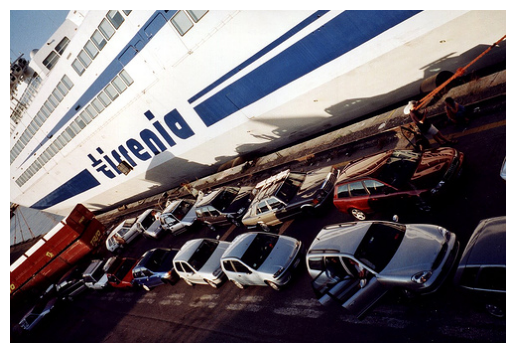

In [59]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [60]:
import ast

bbox = ast.literal_eval(selected['bbox'])
bbox

([2, [447.04, 207.37, 52.96, 105.27]],
 [2, [299.68, 206.97, 155.89, 103.68]],
 [2, [325.81, 139.58, 131.17, 72.88]],
 [2, [211.2, 224.03, 87.94, 59.55]],
 [2, [227.09, 161.61, 102.92, 58.27]],
 [2, [164.6, 227.33, 59.65, 55.12]],
 [2, [187.59, 178.25, 60.39, 48.15]],
 [2, [122.93, 240.53, 48.14, 43.58]],
 [2, [151.01, 192.41, 37.75, 32.47]],
 [2, [97.93, 249.62, 31.23, 34.26]],
 [8, [0.0, 1.52, 500.0, 214.1]],
 [0, [104.45, 226.23, 16.06, 17.24]],
 [2, [126.86, 201.0, 29.35, 31.27]],
 [0, [400.36, 92.29, 50.85, 45.96]],
 [0, [340.04, 250.24, 29.25, 23.67]],
 [2, [72.61, 253.53, 25.95, 30.56]],
 [0, [436.99, 88.17, 27.78, 34.59]],
 [84, [0.0, 233.0, 20.0, 31.0]],
 [120, [440.0, 25.0, 60.0, 56.0]],
 [128, [77.0, 61.0, 423.0, 159.0]],
 [132, [90.0, 71.0, 410.0, 164.0]],
 [137, [24.0, 118.0, 476.0, 218.0]],
 [143, [0.0, 194.0, 57.0, 54.0]],
 [145, [0.0, 0.0, 92.0, 102.0]],
 [171, [0.0, 2.0, 500.0, 310.0]])

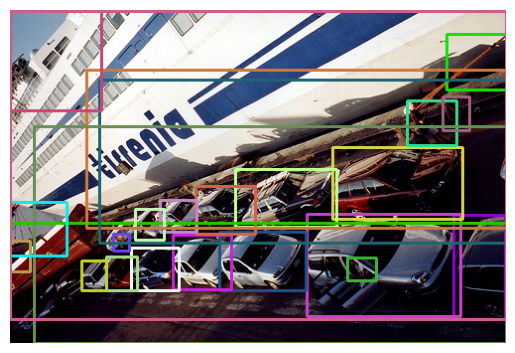

In [61]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
for i in bbox:
    color = [random.randint(0, 255) for _ in range(3)]
    x, y, w, h = i[1]
    x, y, w, h = int(x), int(y), int(w), int(h)
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [ ]:
df_total_catego[df_total_catego['name'] == "tv"]
for i in bbox:
    print(df_total_catego[df_total_catego['id'] == int(i[0])].values)

In [ ]:
df_total_catego[df_total_catego['id'] == 12]

In [ ]:
np.sort(df_total_images.merge(df_total_annota, left_on="id", right_on="image_id", how="inner", validate="one_to_many").drop(columns=["image_id"])['category_id'].unique())

In [ ]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
alpha = 0.5

overlay = img.copy()
for seg_data in segmentation:
    color = [random.randint(0, 255) for _ in range(3)]
    if isinstance(seg_data, list):
        # Handle polygon format (list of coordinates)
        for poly in seg_data:
            # Convert list of floats to a numpy array of integers, reshaped to (N, 1, 2)
            points = np.array(poly).reshape((-1, 1, 2)).astype(int)
            # Fill the polygon on the overlay
            cv2.fillPoly(overlay, [points], color)
    # elif isinstance(seg_data, dict) and 'counts' in seg_data:
    #     # Handle RLE format (dictionary with 'size' and 'counts')
    #     rle = seg_data
    #     # Decode RLE to a binary mask
    #     binary_mask = maskUtils.decode(rle)
    #     # Expand mask to 3 channels to apply color
    #     color_mask = np.zeros_like(overlay, dtype=np.uint8)
    #     color_mask[binary_mask == 1] = color
    #     # Add the RLE mask to the overlay
    #     overlay = cv2.addWeighted(overlay, 1, color_mask, 1, 0)

# img = cv2.addWeighted(img, 1 - alpha, overlay, alpha, 0)
img.shape

plt.imshow(overlay)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [ ]:
test_df = pd.read_parquet('results.parquet')
test_df

In [ ]:
df_total_catego['id'].unique()

In [ ]:
cols = ['segmentation', 'bbox', 'category_id']
for col in cols:
    test_df[col] = test_df[col].apply(ast.literal_eval)
test_df = test_df.explode(cols, ignore_index=True).reset_index(drop=True)
test_df

In [ ]:
from pycocotools import mask
t = test_df[test_df['id'] == 139]

full_mask = np.zeros((t['height'][0], t['width'][0]), dtype=np.uint8)

In [ ]:
total_polygons = []
for i in t['segmentation'].to_list():
    if isinstance(i, dict):
        binary_mask = mask.decode(i)
        binary_mask_8u = np.asfortranarray(binary_mask, dtype=np.uint8)
        # Find contours
        contours, _ = cv2.findContours(binary_mask_8u, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        segmentation_polygons = []
        print(len(contours))
        for contour in contours:
            # Flatten the contour and convert to a list
            polygon = contour.flatten().tolist()
            # COCO polygons require at least 3 points (6 coordinates)
            if len(polygon) >= 6:
                print(f"\t polygons = {len(polygon)}")
                segmentation_polygons.append(polygon)
        print(f"\t Total = {len(segmentation_polygons)}")
        total_polygons.append(segmentation_polygons)
    else:
        total_polygons.append([])

In [ ]:
t['rle'] = total_polygons

In [ ]:
df_total_catego[df_total_catego['id'] == 181]

In [ ]:
t.iloc[20:]

In [ ]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
alpha = 0.5

overlay = img.copy()
for seg_data in t.iloc[20:]['rle'].to_list():
    color = [random.randint(0, 255) for _ in range(3)]
    if isinstance(seg_data, list):
        # Handle polygon format (list of coordinates)
        for poly in seg_data:
            # Convert list of floats to a numpy array of integers, reshaped to (N, 1, 2)
            points = np.array(poly).reshape((-1, 1, 2)).astype(int)
            # Fill the polygon on the overlay
            cv2.fillPoly(overlay, [points], color)
    # elif isinstance(seg_data, dict) and 'counts' in seg_data:
    #     # Handle RLE format (dictionary with 'size' and 'counts')
    #     rle = seg_data
    #     # Decode RLE to a binary mask
    #     binary_mask = maskUtils.decode(rle)
    #     # Expand mask to 3 channels to apply color
    #     color_mask = np.zeros_like(overlay, dtype=np.uint8)
    #     color_mask[binary_mask == 1] = color
    #     # Add the RLE mask to the overlay
    #     overlay = cv2.addWeighted(overlay, 1, color_mask, 1, 0)

# img = cv2.addWeighted(img, 1 - alpha, overlay, alpha, 0)
img.shape

In [ ]:
plt.imshow(img)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [ ]:
mask.decode(t.iloc[20:]['segmentation'].to_list()[-2])

In [ ]:
plt.imshow(mask.decode(t.iloc[20:]['segmentation'].to_list()[-2]))
plt.grid(visible=False)
plt.axis('off')
plt.show()